<center><h1>ASSIGNMENT 1</h1></center><break><center><h2>VISUALIZATION</h2></center><break><center><h2>HANI NAFISAH AMALIYA</h2></center><break><center><h3>KELAS PYTN-10</h3></center>

In [1]:
# Import Library
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from PIL import Image as img
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

In [2]:
# Membaca File
df_lon = pd.read_csv("london_crime_by_lsoa.csv")

In [4]:
df_lon.shape

(13490604, 7)

In [3]:
# Menampilkan Semua Kolom

pd.set_option("display.max.columns", None)

df_lon.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [4]:
# Menampilkan Info Setiap Kolom
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
# perubahan tipe data
df_lon['year'] = df_lon['year'].astype("object")

In [6]:
df_lon['month'] = df_lon['month'].astype("object")

df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            object
 6   month           object
dtypes: int64(1), object(6)
memory usage: 720.5+ MB


In [7]:
# Transpose Data

df_lon.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01001010,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Theft From Motor Vehicle,522180
year,13490604,9,2016,1498956
month,13490604,12,12,1124217


In [8]:
df_lon['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=object)

In [9]:
total_num = df_lon.describe(include=np.number)

total_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [10]:
print('MIN: {}, MAX: {}, UNIQUE_VALUES: {}, MODE: {}'.
      format(int(total_num['value']['min']),
             int(total_num['value']['max']),
             df_lon['value'].unique().shape[0],
             stats.mode(df_lon['value'])[0][0]))

MIN: 0, MAX: 309, UNIQUE_VALUES: 247, MODE: 0


In [105]:
#styling
mpl.style.use(['ggplot'])

## 1. Area Plot

In [29]:
sunting = df_lon.sort_values(['major_category'], ascending=False, axis=0, inplace=True)
teratas = sunting.groupby('major_category', axis=0).sum()
df_top5 = df_lon.head()

df_top5 = df_top5[year].transpose()




df_top5.head()

AttributeError: 'NoneType' object has no attribute 'groupby'

In [21]:
df_top5.index = df_top5.index.map(int)

df_top5['value'].plot(kind = 'area',
            stacked = False,
            figsize = (20, 10))

plt.title ('Data tahun')
plt.ylabel('jumlah')
plt.xlabel('tahun')

plt.show()

ValueError: invalid literal for int() with base 10: 'lsoa_code'

## 2. Histogram

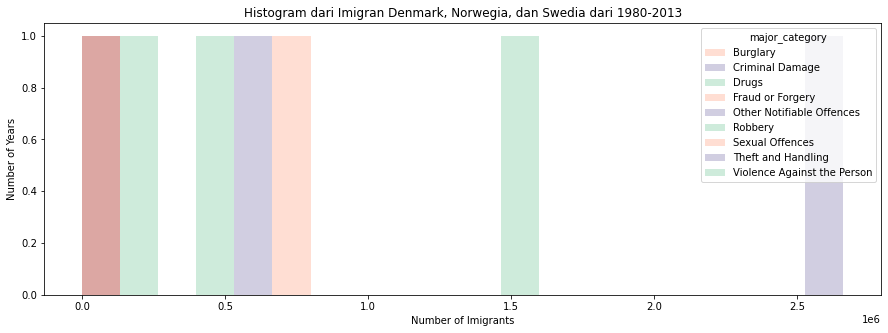

In [37]:
df_major_category = df_lon.groupby('major_category', axis=0).sum()

trans = df_major_category.T

count, bin_edges = np.histogram(trans, bins=10)

trans.plot(kind='hist',
             alpha=0.25, #transparansi
             bins=20,
             figsize=(15,5),
             color=['coral', 'darkslateblue', 'mediumseagreen']);

#menambahkan judul
plt.title('Histogram dari Imigran Denmark, Norwegia, dan Swedia dari 1980-2013');

#menambahkan keterangan di sumbu-y
plt.ylabel('Number of Years');

#menambahkan keterangan di sumbu-x
plt.xlabel('Number of Imigrants');

## 3. Bar Chart

Pertanyaan : Jumlah kejahatan pada kategori Minor di kota London dari tahun 2008 hingga 2016

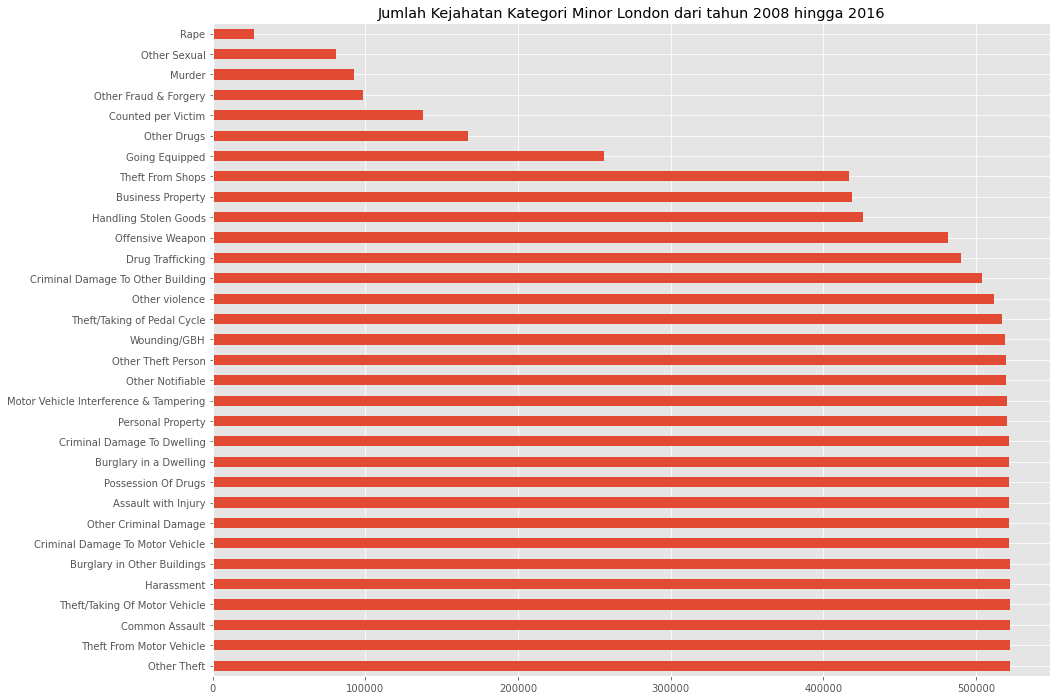

In [134]:
minor_ctg= df_lon.minor_category.value_counts(ascending=False)



minor_ctg.plot.barh(figsize=(15, 12),
                    title = "Jumlah Kejahatan Kategori Minor London dari tahun 2008 hingga 2016");

## 4. Pie Chart
Pertanyaan : Bagaimana persentase jumlah kejahatan pada kategori Major di kota London dari tahun 2008 hingga 2016?

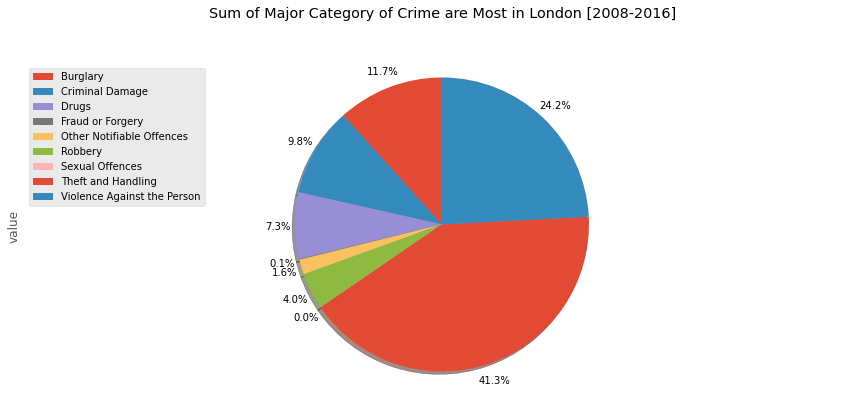

In [185]:
df_major_category= df_lon.groupby('major_category', axis=0).sum()



df_major_category['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,
                            
                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()

## 5. Box Plot

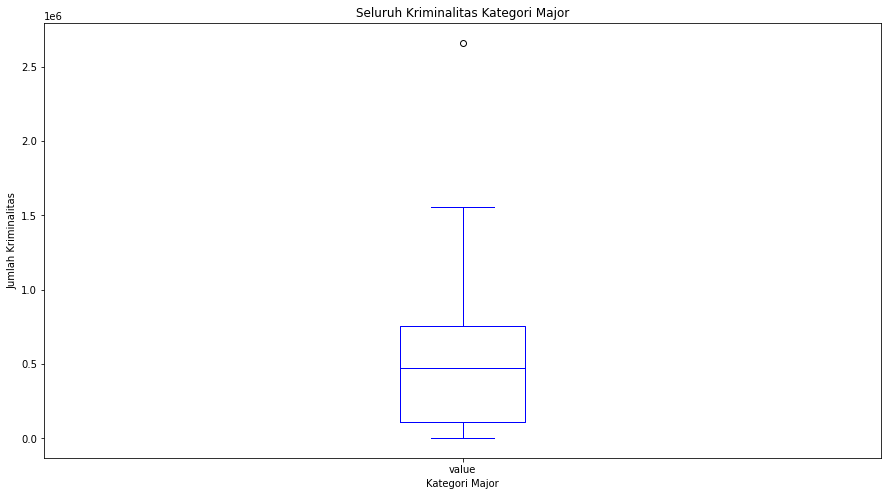

In [13]:
# Seluruh Kriminalitas Kategori Minor

df_minor_category = df_lon.groupby('major_category', axis=0).sum()

df_minor_category['value'].plot(kind = 'box',
             stacked = False,
             color = 'blue',
             figsize=(15,8)); #agar grafik tidak menutupi tulisan

#menambahkan judul
plt.title('Seluruh Kriminalitas Kategori Major');

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas');

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Major');

## 6. Scatter Plot

Pertanyaan : Banyak kriminalitas setiap bulan di tahun 2016

In [138]:
minor_ctg = df_lon.minor_category.value_counts(ascending=False)
minor_ctg.plot(kind='scatter', x='borough', y='year');

ValueError: plot kind scatter can only be used for data frames

## 7. Word Clouds

In [14]:
kata_borough = df_lon['minor_category']

kata_borough

0           Burglary in Other Buildings
1                        Other violence
2                        Other violence
3           Burglary in Other Buildings
4                     Personal Property
                       ...             
13490599    Criminal Damage To Dwelling
13490600              Personal Property
13490601         Burglary in a Dwelling
13490602              Business Property
13490603                   Wounding/GBH
Name: minor_category, Length: 13490604, dtype: object

In [15]:
kata_borough.to_csv("./set/crime_by_borough.txt", header=None, index=None, sep=' ', mode='a')

In [16]:
borough = open ("./set/crime_by_borough.txt", 'r').read()

In [17]:
stopwords = set (STOPWORDS)
borough_wc = WordCloud(
    background_color = 'white',
    stopwords = stopwords)
borough_wc.generate(borough);

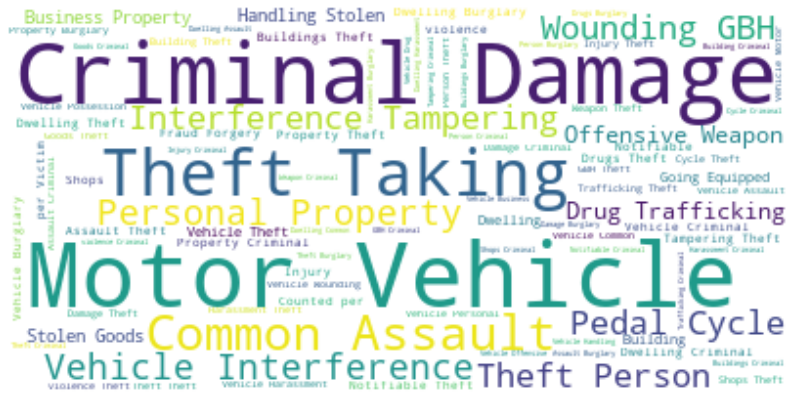

In [18]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(borough_wc, interpolation = 'bilinear')
plt.axis('off')

plt.show()